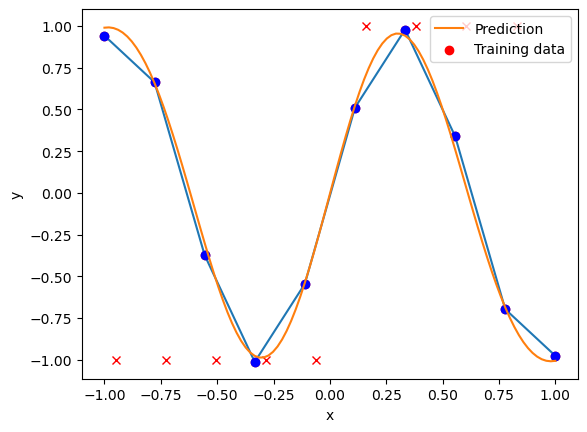

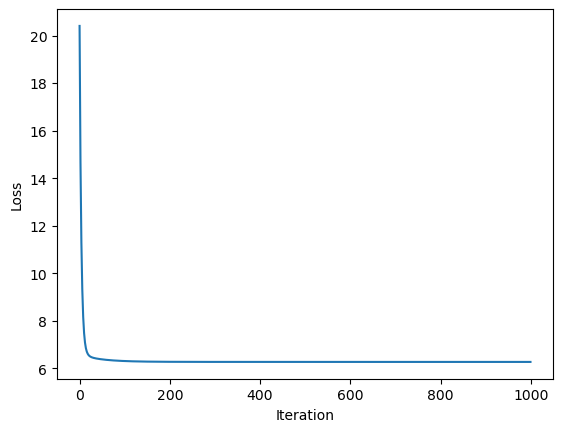

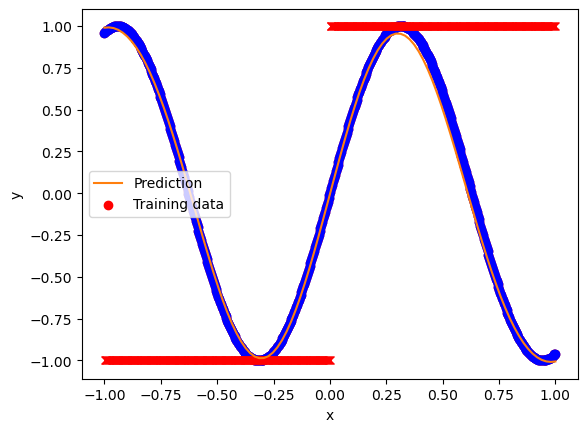

In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from scipy.special import expit

n = 7
u = np.linspace(-1, 1, n)
sigma = 0.3

# 高斯基函数
def phi(x):
    return np.exp(-np.power(x.reshape((-1 , 1)) - u, 2) / (2 * np.power(sigma, 2)))

# 用于计算 Sigmoid 函数
# 1 / (1 + e^(x))
def Phi(x):
    return expit(x)

def phi_guassian(x, mu, sigma):
    return np.exp(-np.power(x - mu, 2) / (2 * np.power(sigma, 2)))


# f(w)
def f(w, a, t, b, s, alpha, beta, n):
    y1 = phi(a).dot(w)
    
    f1 = - 0.5 * beta * np.sum(np.square(y1 - t)) # 第一项
    f2 = np.sum(np.log(Phi(s * np.dot(phi(b), w))))
    f3 = 0.5 * alpha * np.sum(np.square(w))
    return f1 + f2 + f3

# 梯度
def grad_f(w, a, t, b, s, alpha, beta, n):
    # print(t.shape)
    y1 = np.dot(phi(a), w)
    y2 = s * Phi(s.dot(np.dot(phi(b), w)))

    grad1 = - beta * (phi(a).T.dot(y1 - t))
    grad2 = phi(b).T.dot(y2 - s)
    grad3 = - alpha * w

    return grad1 + grad2 + grad3

# 梯度下降算法
def gradient_descent(w0, a, t, b, s, alpha, beta, n, h, max_iter, callback=None):
    w = np.copy(w0)
    for _ in range(max_iter):
        grad = grad_f(w, a, t, b, s, alpha, beta, n)
        w += h * grad

        if callback is not None:
            loss = - f(w, a, t, b, s, alpha, beta, n)
            callback(w, loss)

    return w

# 回归训练集样本数
m = 10
# 噪声
e = rd.gauss(0, 0.03)
# 生成回归训练集
a = np.linspace(-1, 1, 10)

t = np.sin(5 * a) + e

# m - 1 分类训练集样本数
# 生成分类训练集
b = np.linspace(-1, 1, m - 1)

for i in range (len(a) - 1):
    b[i] = a[i] + 0.5 / m

y = np.sign(b + e)

# 定义超参数
alpha = 0.001
beta = 6.7

h = 0.02
max_iter = 1000

w0 = np.zeros(phi(a).shape[1])

w = gradient_descent(w0,
                    a,
                    t,
                    b,
                    y,
                    alpha,
                    beta,
                    n,
                    h,
                    max_iter)


x = np.linspace(-1, 1, 100)
d = np.dot(phi(x), w)

plt.plot(a, t)
plt.plot(a, t, 'bo')
plt.plot(b, y, 'rx')
plt.plot(x, d, label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(a, t, c='r', label='Training data')
plt.legend()
plt.show()

# 绘制损失函数值的变化
def callback(w, loss):
    losses.append(loss)

losses = []
gradient_descent(w0,
                    a,
                    t,
                    b,
                    y,
                    alpha,
                    beta,
                    n,
                    h,
                    max_iter,
                    callback=callback)

x= np.array(range(len(losses)))

plt.plot(x, losses)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()



# 生成测试集
m = 500
# 生成回归测试集
a = np.linspace(-1, 1, m)

t = np.sin(5 * a)

# m - 1 分类训练集样本数
# 生成分类训练集
b = np.linspace(-1, 1, m - 1)

for i in range (len(a) - 1):
    b[i] = a[i] + 0.5 / m

y = np.sign(b)

x = np.linspace(-1, 1, 100)
d = np.dot(phi(x), w)

plt.plot(a, t)
plt.plot(a, t, 'bo')
plt.plot(b, y, 'rx')
plt.plot(x, d, label='Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(a, t, c='r', label='Training data')
plt.legend()
plt.show()
